In [2]:
import numpy as np
%pip install plotly==5.8.0
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import seaborn as sb
import statsmodels.api as sm
import plotly.express as px
from google.colab import files
%pip install kaleido
import kaleido
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format
import plotly.io as pio

pio.renderers.default = "svg"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 17.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00


In [3]:
from google.colab import files
files.upload()

Saving data1.csv to data1.csv


{'data1.csv': b'0,Brand,Type,Battery _capacity,model,seats,price,age,annual_savings,BodyStyle,RapidCharge\r\n1,GEMPL,twowheeler,3,Ampere nexus,1,120000,25-35,36445,electric bike,3.3\r\n2,ATHER,twowheeler,3.7,Ather rizta,1,144999,25-35,9972,electric bike,4.3\r\n3,ATUL,threewheeler,12,atul elite rickshaw,4,112000,25-40,108730,electric ricksaw,10\r\n4,BAJAJ,twowheeler,3.2,Chetak Premium,1,147243,25-35,30000,Steel Body,4.3\r\n5,Electrotherm ,twowheeler,1.25,YoBykes,1,58000,25-35,"34,500",Electric Scooters,5\r\n6,Hero Electric Vehicles,twowheeler,2,Optima CX 2.0,1,"83,300",25-35,"9,000",Electric Scooters,4.5\r\n7,Hyundai Motor India,four wheeler,39.2,Hyundai Kona Electric specs & features,5,2384000,25-35,615000,SUV,6.1\r\n8,JBM Group,four wheeler,180,Ecolife Electric,40,2000000,30-50,300000,Fully Built,9\r\n9,Mahindra & Mahindra Limited,threewheeler,10.24,ElectricCargo,1,120000,25-50,"1,80,000",Box body,4.5\r\n10,MG Motor,four wheeler,17.3,MG COMET EV,4,699000,30-50,"72,500",Hatchback,7\r\n

In [4]:
df = pd.read_csv('data1.csv', encoding='latin-1') # Try reading the file with 'latin-1' encoding

In [5]:
# Check the column names of the dataframe
print(df.columns)

# If 'Unnamed: 0' is not in the list of columns, identify the correct column name to drop
# For example, if the column to drop is named 'index', use:


Index(['0', 'Brand', 'Type', 'Battery _capacity', 'model', 'seats', 'price',
       'age', 'annual_savings', 'BodyStyle', 'RapidCharge'],
      dtype='object')


In [6]:
# Convert the 'price' column to numeric type
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Now perform the multiplication
df['inr(10e3)'] = df['price']*0.08320

# Proceed with the rest of your code
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
df.head()

,0,Brand,Type,Battery _capacity,model,seats,price,age,annual_savings,BodyStyle,RapidCharge,inr(10e3)
0,1,GEMPL,twowheeler,3,Ampere nexus,1,120000.0000,25-35,36445,electric bike,3.3,9984.0000
1,2,ATHER,twowheeler,3.7,Ather rizta,1,144999.0000,25-35,9972,electric bike,4.3,12063.9168
2,3,ATUL,threewheeler,12,atul elite rickshaw,4,112000.0000,25-40,108730,electric ricksaw,10,9318.4000
3,4,BAJAJ,twowheeler,3.2,Chetak Premium,1,147243.0000,25-35,30000,Steel Body,4.3,12250.6176
4,5,Electrotherm,twowheeler,1.25,YoBykes,1,58000.0000,25-35,"34,500",Electric Scooters,5,4825.6000


In [7]:
df[(df['Brand'] == 'ATUL ') | (df['Brand'] == 'ATUL ')]

,0,Brand,Type,Battery _capacity,model,seats,price,age,annual_savings,BodyStyle,RapidCharge,inr(10e3)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   0                  16 non-null     int64  
 1   Brand              16 non-null     object 
 2   Type               16 non-null     object 
 3   Battery _capacity  16 non-null     object 
 4   model              16 non-null     object 
 5   seats              16 non-null     int64  
 6   price              15 non-null     float64
 7   age                16 non-null     object 
 8   annual_savings     15 non-null     object 
 9   BodyStyle          16 non-null     object 
 10  RapidCharge        16 non-null     object 
 11  inr(10e3)          15 non-null     float64
dtypes: float64(2), int64(2), object(8)
memory usage: 1.6+ KB


In [9]:
df.isnull().sum()

0                    0
Brand                0
Type                 0
Battery _capacity    0
model                0
seats                0
price                1
age                  0
annual_savings       1
BodyStyle            0
RapidCharge          0
inr(10e3)            1
dtype: int64

In [10]:
df.describe()

,0,seats,price,inr(10e3)
count,16.0000,16.0000,15.0000,15.0000
mean,8.5000,7.0000,1065349.4000,88637.0701
std,4.7610,12.9923,1579192.3085,131388.8001
min,1.0000,1.0000,58000.0000,4825.6000
25%,4.7500,1.0000,120000.0000,9984.0000
50%,8.5000,1.0000,150000.0000,12480.0000
75%,12.2500,5.0000,1974500.0000,164278.4000
max,16.0000,40.0000,5815000.0000,483808.0000


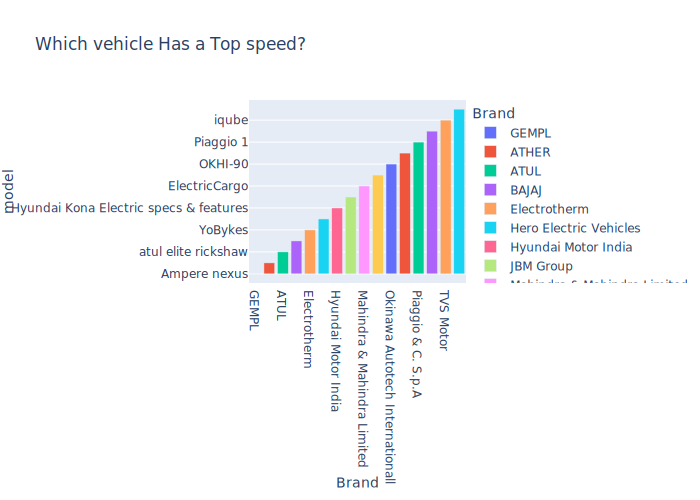

In [11]:
fig = px.bar(df,x='Brand',y = 'model',color = 'Brand',title = 'Which vehicle Has a Top speed?',labels = {'x':' Brands','y':'model'})
pio.show(fig)

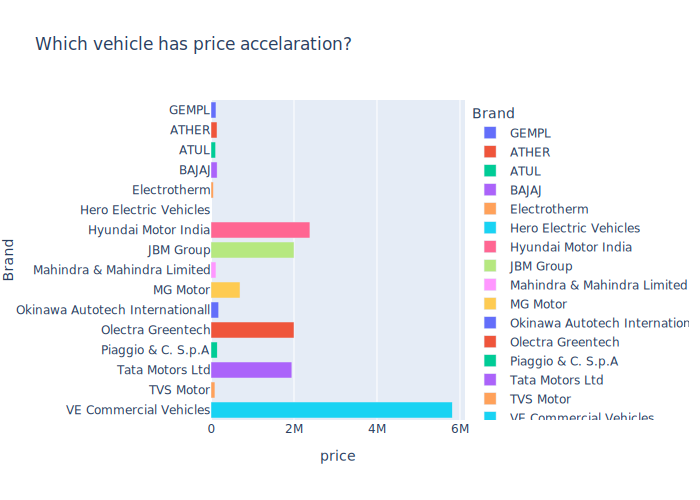

In [12]:
fig = px.bar(df,x='price',y = 'Brand',color = 'Brand',title = 'Which vehicle has price accelaration?',labels = {'x':'price','y':' Brands'})
pio.show(fig)

<Axes: title={'center': 'annual_savings'}, xlabel='No. of Samples', ylabel='annual_savings'>

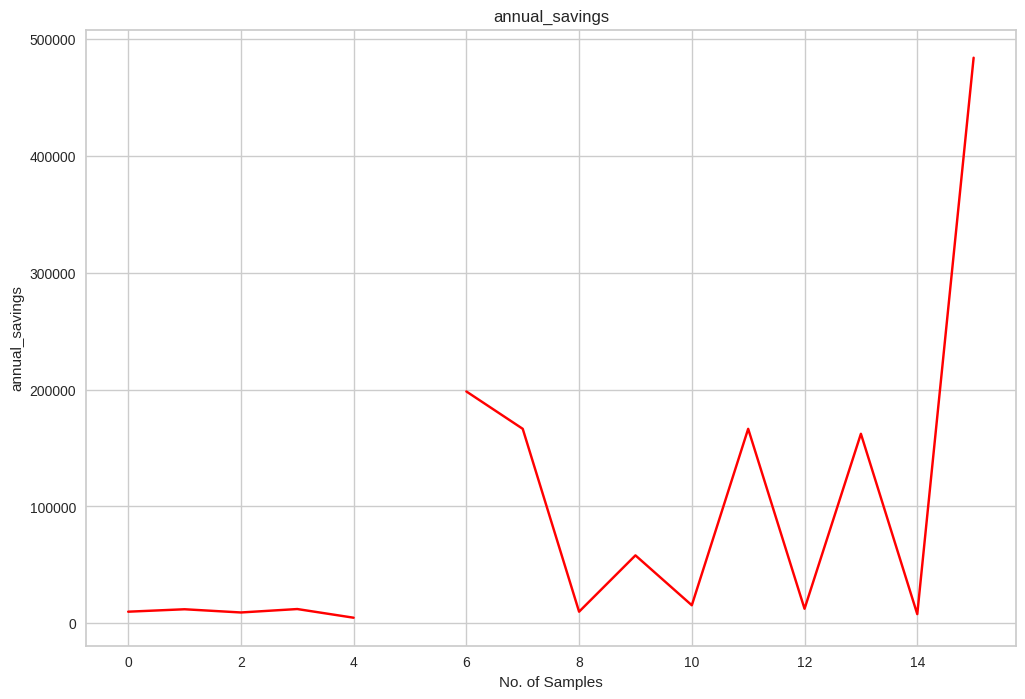

In [ ]:
df['inr(10e3)'].plot(figsize = (12,8),title='annual_savings',xlabel = 'No. of Samples',ylabel = 'annual_savings',color = 'red')

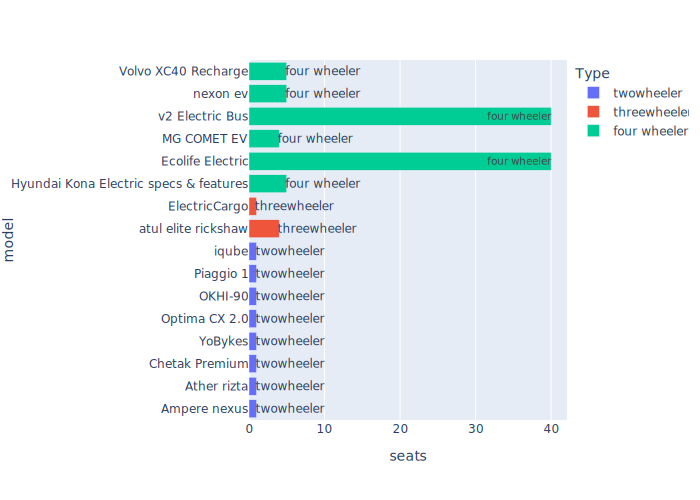

In [ ]:
fig = px.bar(df,x = 'seats',y = 'model',color = 'Type',text='Type')
pio.show(fig)

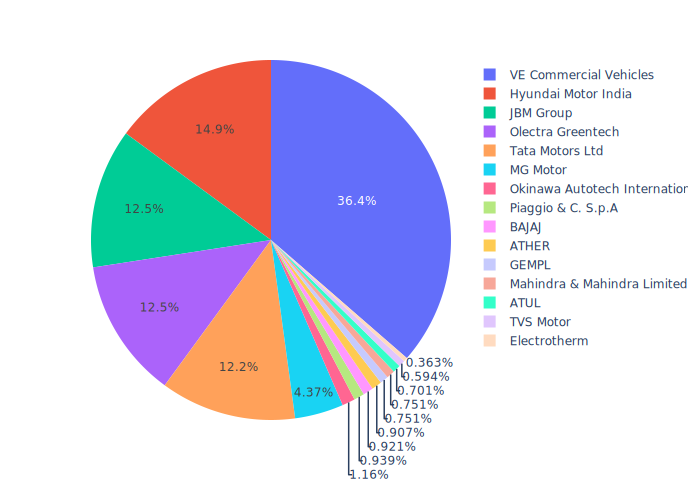

In [ ]:
fig = px.pie(df,names = 'Brand',values = 'inr(10e3)')
pio.show(fig)

In [ ]:
fig = px.scatter_3d(df,x = 'Brand',y = 'seats',z = 'model',color='Type')

In [ ]:
fig = px.scatter_3d(df,x = 'Brand',y = 'Battery _capacity',z = 'inr(10e3)',color = 'Brand')

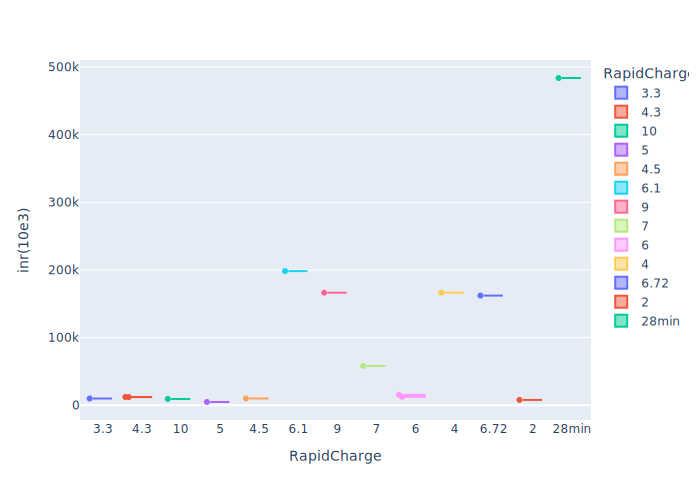

In [ ]:
fig = px.box(df,x='RapidCharge',y = 'inr(10e3)',color = 'RapidCharge',points='all')
pio.show(fig)

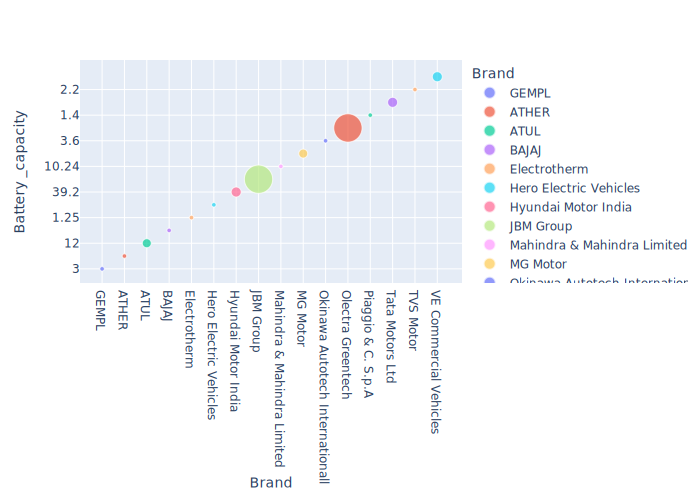

In [ ]:
fig = px.scatter(df,x = 'Brand',y = 'Battery _capacity',size='seats',color = 'Brand',hover_data=['RapidCharge','inr(10e3)'])
pio.show(fig)

In [ ]:
sb.pairplot(df,hue='RapidCharge')


Heatmap to show the correlation of the data

In [ ]:
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        print(f"Cannot convert {value} to float")
        return None  # or some other default value or behavior

values = ['3.14', '2.71', 'Tesla ', '1.41']

# Apply the conversion function to the list
converted_values = [convert_to_float(value.strip()) for value in values]
print(converted_values)

Cannot convert Tesla to float
[3.14, 2.71, None, 1.41]


<Axes: >

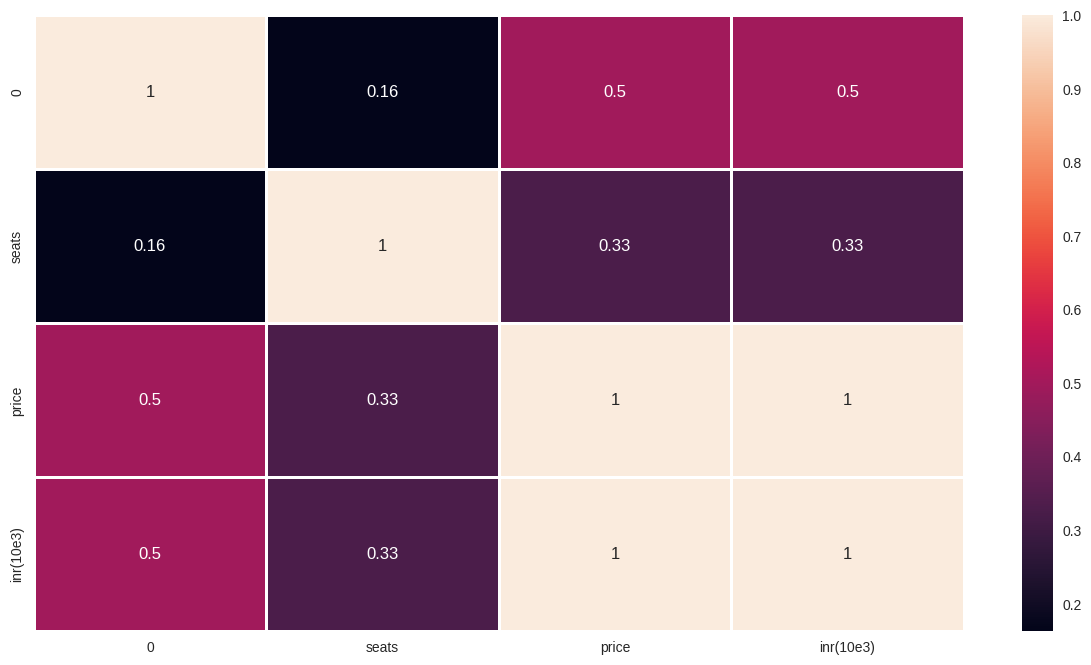

In [ ]:
ax= plt.figure(figsize=(15,8))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sb.heatmap(numerical_df.corr(),linewidths=1,linecolor='white',annot=True)

Making Some Comparisions for our dataset
Frequency of the Brands in the dataset

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'GEMPL'),
  Text(1, 0, 'ATHER'),
  Text(2, 0, 'ATUL'),
  Text(3, 0, 'BAJAJ'),
  Text(4, 0, 'Electrotherm '),
  Text(5, 0, 'Hero Electric Vehicles'),
  Text(6, 0, 'Hyundai Motor India'),
  Text(7, 0, 'JBM Group'),
  Text(8, 0, 'Mahindra & Mahindra Limited'),
  Text(9, 0, 'MG Motor'),
  Text(10, 0, ' Okinawa Autotech Internationall'),
  Text(11, 0, 'Olectra Greentech'),
  Text(12, 0, 'Piaggio & C. S.p.A'),
  Text(13, 0, 'Tata Motors Ltd'),
  Text(14, 0, 'TVS Motor'),
  Text(15, 0, 'VE Commercial Vehicles ')])

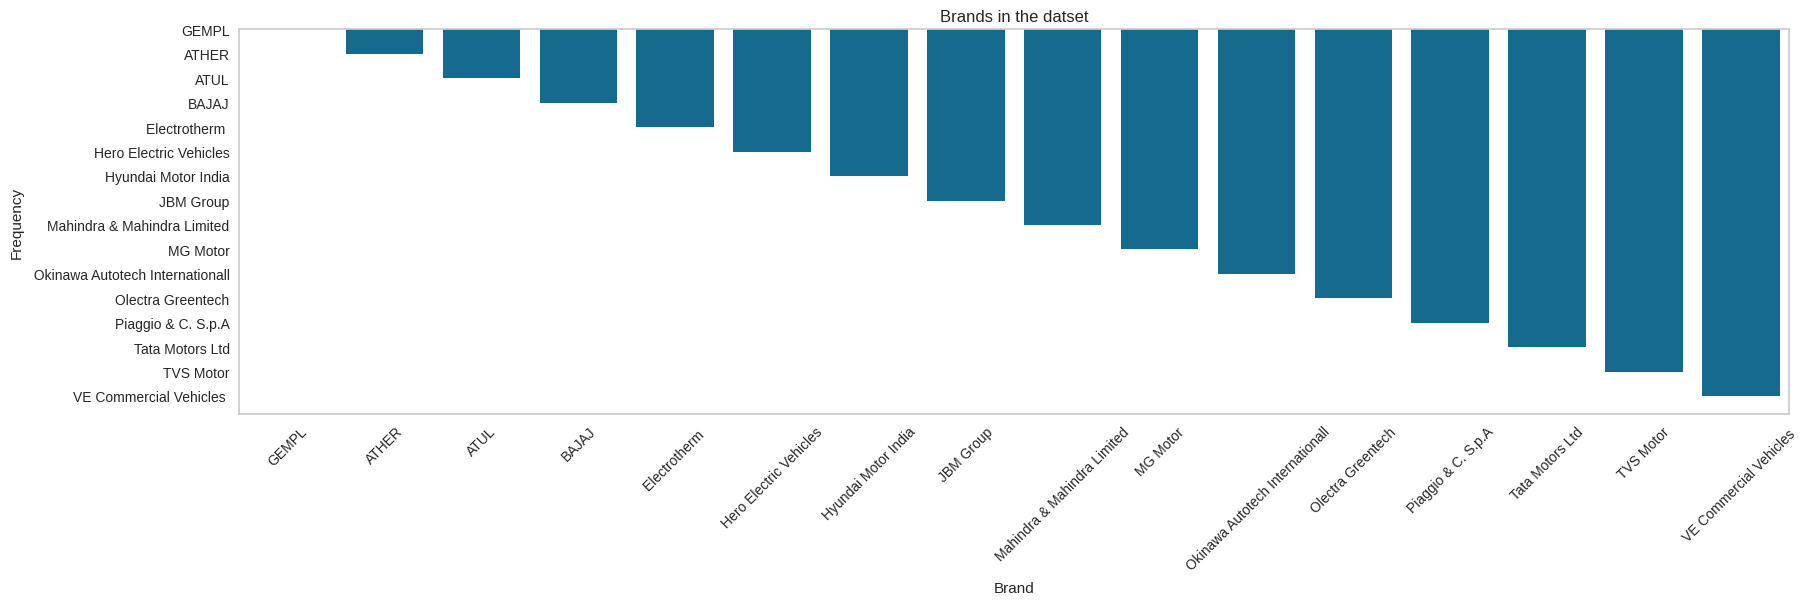

In [ ]:
ax= plt.figure(figsize=(20,5))

a = df['Brand']
sb.barplot(x='Brand',y=a,data=df)
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

MORE BATTERY CAPACITY'

<ipython-input-38-eb9cbccd5276>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0, 1, 2],
 [Text(0, 0, 'twowheeler'),
  Text(1, 0, 'threewheeler'),
  Text(2, 0, 'four wheeler')])

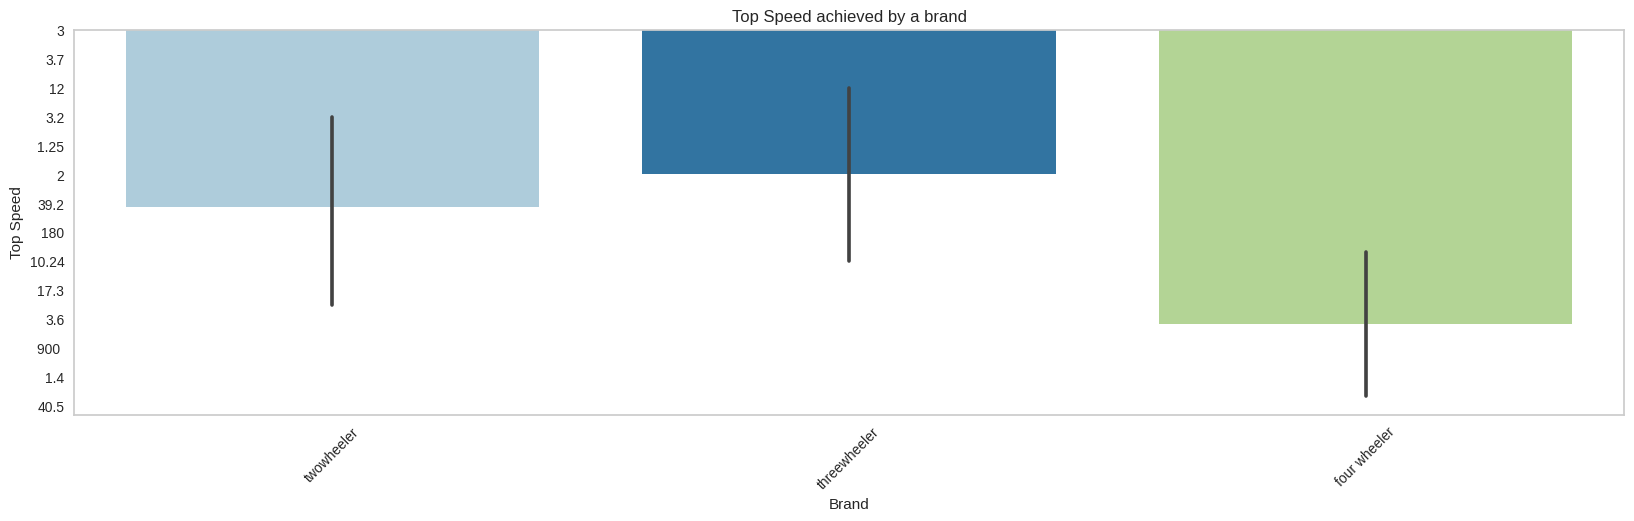

In [ ]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Type',y='Battery _capacity',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('MORE BATTERY CAPACITY')
plt.xlabel('BATTERY')
plt.ylabel('TYPE')
plt.xticks(rotation=45)

Price

<ipython-input-39-a7dc16fd447f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'GEMPL'),
  Text(1, 0, 'ATHER'),
  Text(2, 0, 'ATUL'),
  Text(3, 0, 'BAJAJ'),
  Text(4, 0, 'Electrotherm '),
  Text(5, 0, 'Hero Electric Vehicles'),
  Text(6, 0, 'Hyundai Motor India'),
  Text(7, 0, 'JBM Group'),
  Text(8, 0, 'Mahindra & Mahindra Limited'),
  Text(9, 0, 'MG Motor'),
  Text(10, 0, ' Okinawa Autotech Internationall'),
  Text(11, 0, 'Olectra Greentech'),
  Text(12, 0, 'Piaggio & C. S.p.A'),
  Text(13, 0, 'Tata Motors Ltd'),
  Text(14, 0, 'TVS Motor'),
  Text(15, 0, 'VE Commercial Vehicles ')])

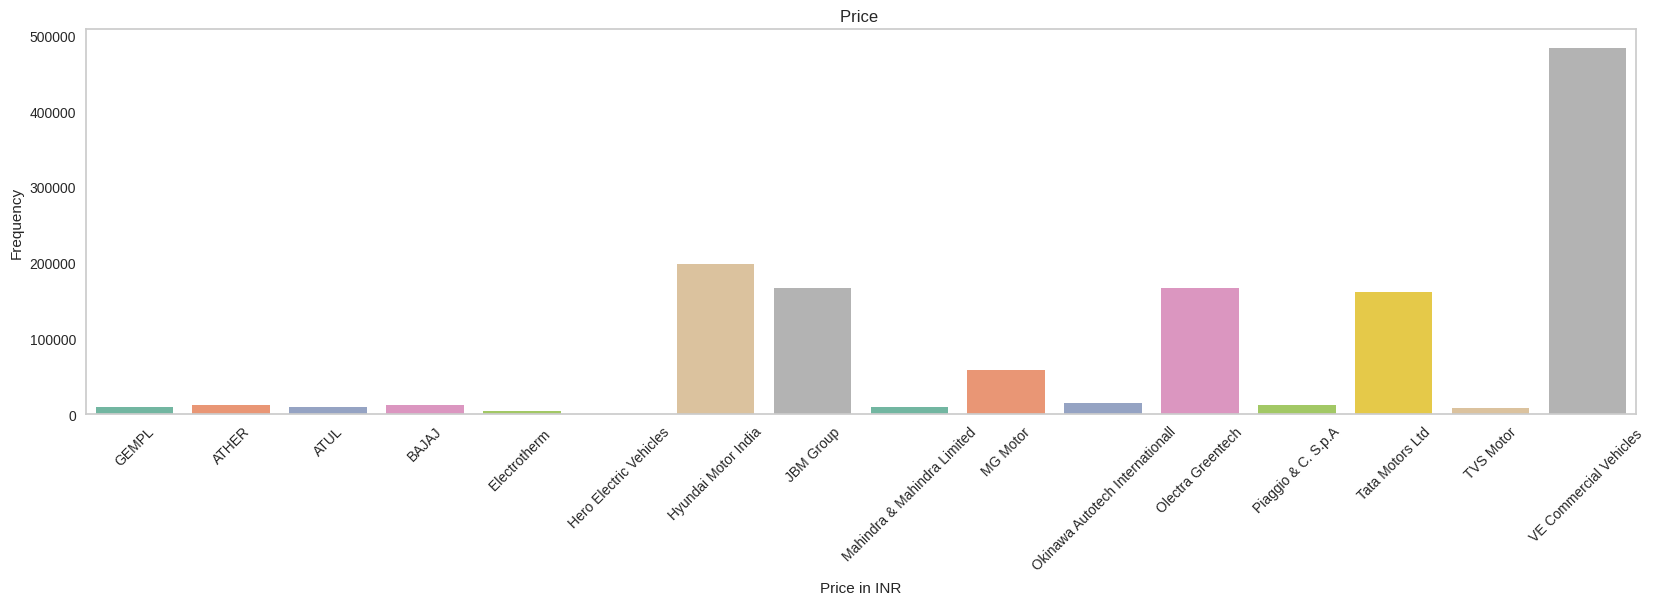

In [ ]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='inr(10e3)',data=df,palette='Set2')
plt.title('Price ')
plt.xlabel('Price in INR')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

BODY TYPE

Text(0.5, 1.0, 'BodyStyle')

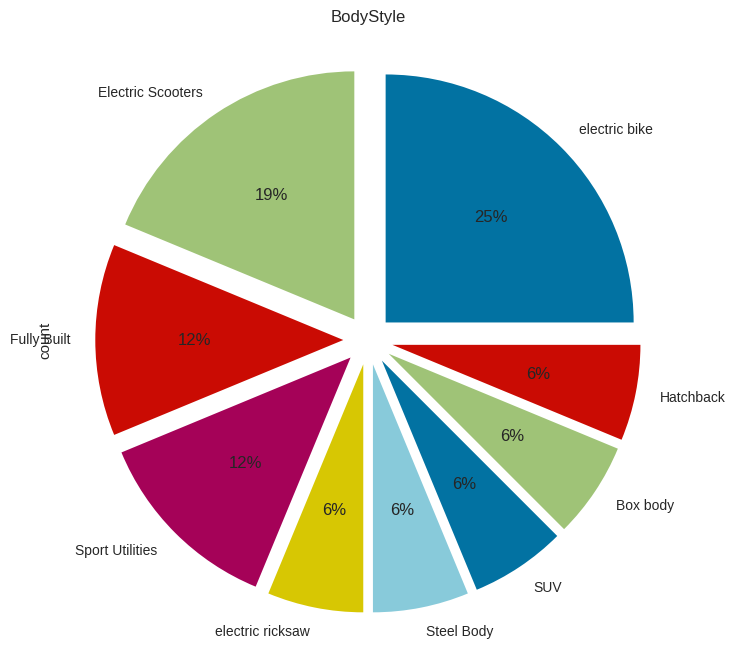

In [ ]:
df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=np.full(len(df['BodyStyle'].value_counts()),0.1)) # Adjust explode to match the number of slices
plt.title('BodyStyle')

Number of Seats

Text(0.5, 1.0, 'seats')

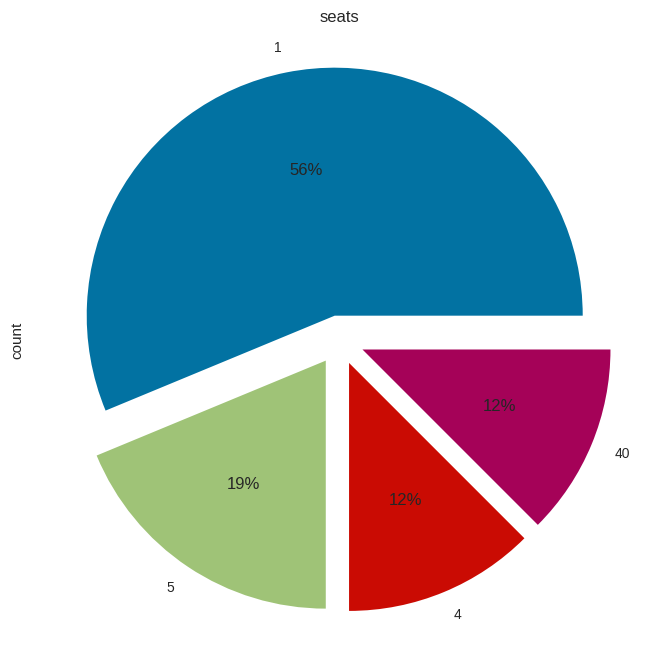

In [ ]:
df['seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=np.full(len(df['seats'].value_counts()),0.1)) # Adjust explode to match the number of slices
plt.title('seats')

In [ ]:
df3= df[["Type", "inr(10e3)"]].groupby("Type").count()
df4= df[["age", "inr(10e3)"]].groupby("age").count()
df5= df[["age", "Type"]].groupby("age").count()
df5.head()

,Type
age,
25-35,9
25-40,1
25-50,2
30-50,4


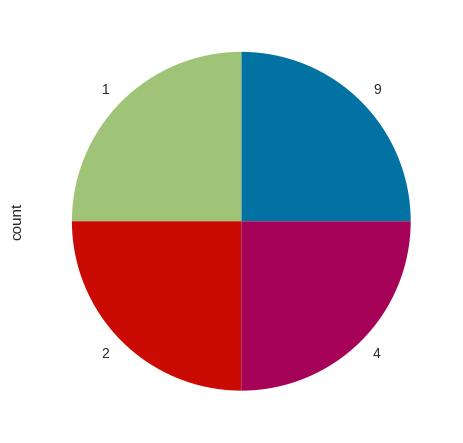

In [ ]:
import matplotlib.pyplot as plt

# Assuming you want to create a pie chart based on the distribution of 'Type' in df5
df5.Type.value_counts().plot.pie()
plt.show()

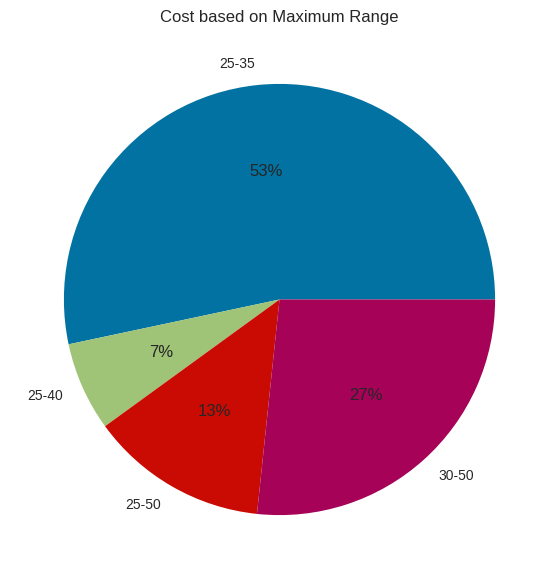

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Cost based on Maximum Range')
plt.pie(x=df4["inr(10e3)"],labels=df4.index,autopct='%1.0f%%')
plt.show()


Regression
Putting independent variables as x and dependent variable as y

In [ ]:
df['Type'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)
x=df[['Brand','Battery _capacity','model','age', 'RapidCharge','annual_savings']]
y=df['price']


In [ ]:
import pandas as pd # Import pandas for data manipulation
import statsmodels.api as sm
import numpy as np # Import numpy for numerical operations

# ... your existing code for preparing x and y ...

# Check data types of x and y
print(x.dtypes)
print(y.dtypes)

# Convert any non-numeric columns in 'x' and 'y' to numeric types
# For example, if 'Brand' in 'x' is a string column:
x['Brand'] = pd.Categorical(x['Brand']).codes

# Convert 'model' column to numeric, handling non-numeric values and filling NaNs
x['model'] = pd.to_numeric(x['model'], errors='coerce').fillna(0)

# Explicitly convert all columns in 'x' to numeric, handling errors
for col in x.columns:
    if x[col].dtype == 'object':
        x[col] = pd.to_numeric(x[col], errors='coerce').fillna(0)

# Check for and handle non-numeric values in 'y'
if y.dtype == 'object':
    y = pd.to_numeric(y, errors='coerce').fillna(0)

# Add constant to x
x = sm.add_constant(x)
results = sm.OLS(y, x)
print(results.summary())

const                float64
Brand                   int8
Battery _capacity    float64
model                float64
age                  float64
RapidCharge          float64
annual_savings       float64
dtype: object
float64


AttributeError: module 'statsmodels.api' has no attribute 'ATUL'

In [ ]:
import pandas as pd # Import pandas for data manipulation
import statsmodels.api as sm
import numpy as np # Import numpy for numerical operations

# ... your existing code for preparing x and y ...

# Check data types of x and y
print(x.dtypes)
print(y.dtypes)

# Convert any non-numeric columns in 'x' and 'y' to numeric types
# For example, if 'Brand' in 'x' is a string column:
x['Brand'] = pd.Categorical(x['Brand']).codes

# Convert 'model' column to numeric, handling non-numeric values and filling NaNs
x['model'] = pd.to_numeric(x['model'], errors='coerce').fillna(0)

# Explicitly convert all columns in 'x' to numeric, handling errors
for col in x.columns:
    if x[col].dtype == 'object':
        x[col] = pd.to_numeric(x[col], errors='coerce').fillna(0)

# Check for and handle non-numeric values in 'y'
if y.dtype == 'object':
    y = pd.to_numeric(y, errors='coerce').fillna(0)

# Add constant to x
x = sm.add_constant(x)
model = sm.OLS(y, x)  # Create the OLS model
results = model.fit()   # Fit the model to get the results object
print(results.summary()) # Now you can call summary() on the results

const                float64
Brand                   int8
Battery _capacity    float64
model                float64
age                  float64
RapidCharge          float64
annual_savings       float64
dtype: object
float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 22 Jul 2024   Prob (F-statistic):                nan
Time:                        10:23:38   Log-Likelihood:                    nan
No. Observations:                  16   AIC:                               nan
Df Residuals:                      11   BIC:                               nan
Df Model:                           4                                         
Covariance Type:            nonrobust                           

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=16



In [ ]:
# Assuming 'results' is the result of fitting the OLS model in a previous cell
print(results.summary())  # Print the summary directly from the 'results' object

# If you need to fit a new model:
model = sm.OLS(y, x)  # Recreate the OLS model
results = model.fit()   # Fit the model
print(results.summary()) # Print the summary of the new results

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 22 Jul 2024   Prob (F-statistic):                nan
Time:                        10:24:45   Log-Likelihood:                    nan
No. Observations:                  16   AIC:                               nan
Df Residuals:                      11   BIC:                               nan
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                    nan        na

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=16



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [ ]:
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

ValueError: Input y contains NaN.